# Overview #

## Project Info ##

- Developed by: Sean Pritchard
- for: CSCA 5632: Unsupervised Algorithms in Machine Learning Final Project
- URL: https://github.com/seanpritchard94/dermatology
- Data Source: https://archive.ics.uci.edu/dataset/33/dermatology
- Python version: 3.13

## Data Collection and Provenance ##

This data was originally collected by Nilsel Ilter, M.D., Ph.D., Gazi University, School of Medicine, Ankara, Turkey and H. Altay Guvenir, PhD., Bilkent University, Department of Computer Engineering and Information Science, Ankara, Turkey.

The data collection procedure is described as:
> "Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope
> In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible,and 1, 2 indicate the relative intermediate values." (Ilter, N. & Guvenir, H., 1998)

## Unsupervised Learning Problem Description ##

This project will use unsupervised machine learning techniques including KMeans, Agglomerative Clustering to cluster the data samples. The results of clustering will then be compared to the labels to determine accuracy. Additionally, supervised machine learning techniques will be used and results will be compared with the unsupervised clustering.

The researchers who collected the data describe the challenge of differential diagnosis of erythemato-squamous as follows:

> The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. (Ilter, N. & Guvenir, H., 1998)

Because of the challenges in performing differential diagnosis, a machine learning model that can accurately assist in this task would be valuable to dermatologists.

**Type of Learning and Task:** This is a **multiclass classification** machine learning problem. I will evaluate **unsupervised clustering algorithms** including KMeans, Agglomerative Clustering and **supervised learning algorithms** including Random Forest to determine which performs best with this dataset.

**Project Goal:** Determine the effectiveness of various machine learning algorithms and identify the best machine learning algorithm for accurately identifying the underlying disease when a patient presents with erythemato-squamous symptoms.



In [279]:

#import various libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Exploratory Data Analysis, Visualization, and Cleaning #

## Data Cleaning ##

The first step will be to load the data from its raw form and clean it. The original researchers did not provide column names in the data file itslef (but did provide them in other documentation). So we will assign column names. We will also imput missing data to the mean of the data set.


In [246]:
column_names = [
    'erythema',
    'scaling',
    'definite_borders',
    'itching',
    'koebner_phenomenon',
    'polygonal_papules',
    'follicular_papules',
    'oral_mucosal_involvement',
    'knee_and_elbow_involvement',
    'family_history',
    'scalp_involvement',
    'melanin_incontinence',
    'eosinophils_infiltrate',
    'PNL_infiltrate',
    'papillary_dermis_fibrosis',
    'exocytosis',
    'acanthosis',
    'hyperkeratosis',
    'parakeratosis',
    'rete_ridges_clubbing',
    'rete_ridges_elongation',
    'suprapapillary_epidermis_thinning',
    'spongiform_pustule',
    'munro_microabcess',
    'focal_hypergranulosis',
    'granular_layer_disappearance',
    'basal_layer_vacuolisation',
    'spongiosis',
    'sawtooth_retes',
    'follicular_horn_plug',
    'perifollicular_parakeratosis',
    'inflammatory_monoluclear_inflitrate',
    'band_like_infiltrate',
    'age',
    'diagnosis'
]

print('coulumn count:', len(column_names))

df = pd.read_csv('data/dermatology.data', names=column_names, header=None)

df.info()

coulumn count: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   family_history                       366 non-null    int64 
 10  scalp_involvement                    366 non-null    int64 
 11  melanin_incontinence       

The age column is an object rather than an integer, so we need to examine and fix the data there. **Missing data will be imputed to the mean of the column.** The age column includes values of ? and 0. Values of ? are clearly invalid. Values of 0 we will retain and assume they indicate a newborn or very young baby.

In [247]:
print(df['age'].unique())

['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']


In [248]:
#replace (impute) '?' with the mean age.
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['age'] = df['age'].fillna(round(df['age'].mean()))
print(df['age'].unique())

<IntegerArray>
[55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17, 51, 42,
 44, 33, 43, 50, 34, 36, 15, 46, 62, 35, 48, 12, 52, 60, 32, 19, 29, 25, 13,
 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67, 56, 53, 24, 58, 49, 63,
 68,  9, 75]
Length: 60, dtype: Int64


In [249]:
print(df['diagnosis'].value_counts())

diagnosis
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


The labels are a 1 based scheme rather than 0 based. In order to avoid having to convert later, I will shift all labels down by one
so they run 0-5 rather than 1-6

In [250]:
df['diagnosis'] = df['diagnosis'] - 1
print(df['diagnosis'].value_counts())

diagnosis
0    112
2     72
1     61
4     52
3     49
5     20
Name: count, dtype: int64


## EDA and Visualization ##


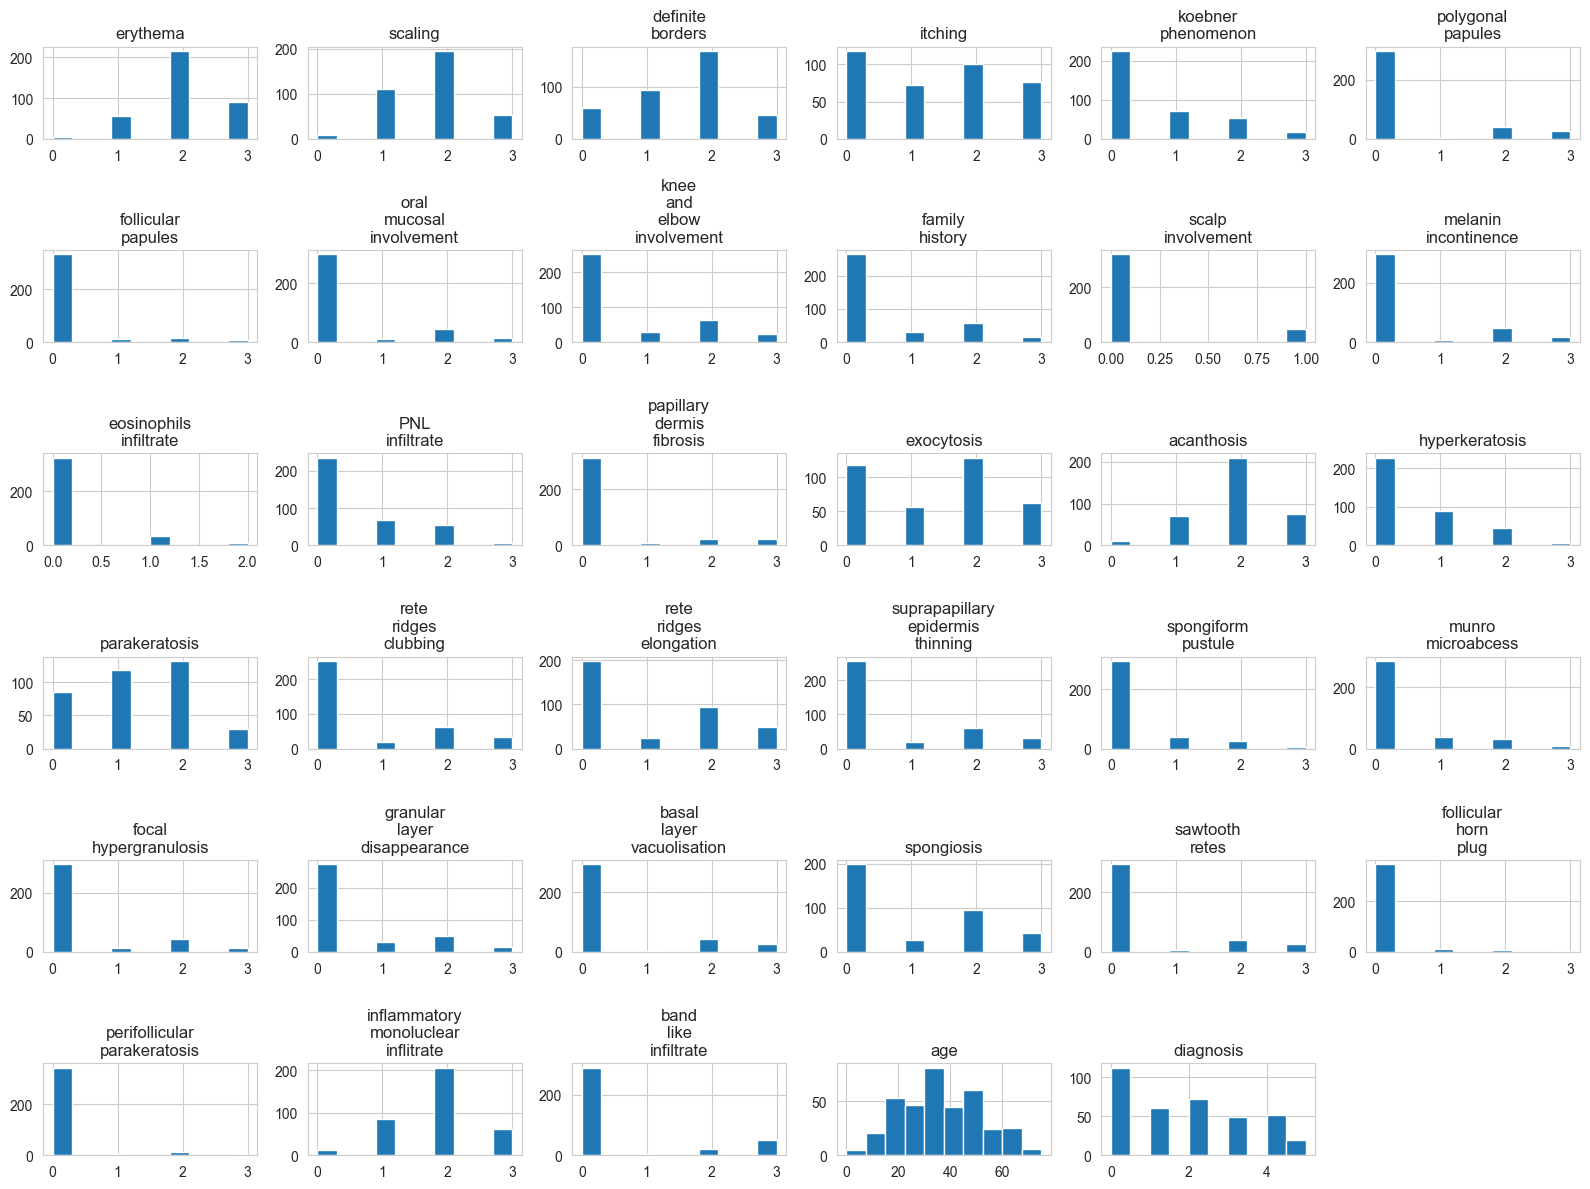

In [251]:
df.hist(figsize=(16, 12), sharex=False, sharey=False)
for ax, col in zip(plt.gcf().axes, df.select_dtypes('number').columns):
    ax.set_title(col.replace('_', '\n'), fontsize=12, pad=6)
plt.tight_layout()
plt.show()

### Description of the Factors (Features) ###
From the histograms above, we can see that most features span a range of 0-3. The documentation of the data set indicates this represents the severity of the symptom. We can see that zeroes are generally the most prevalent.

An additional important thing to note is that the data set is not balanced. There are approximately twice as many diagnoses of "0" as there are of 1-4. And the diagnosis of 5 is rare in comparison. We will need to take care to monitor this when evaluating our models. It suggests we may need to use f1 rather than accuracy as accuracy could be influenced by the imbalanced data set.

We can see that **all of the data is within expected range and there are no outliers to deal with.**


<Axes: >

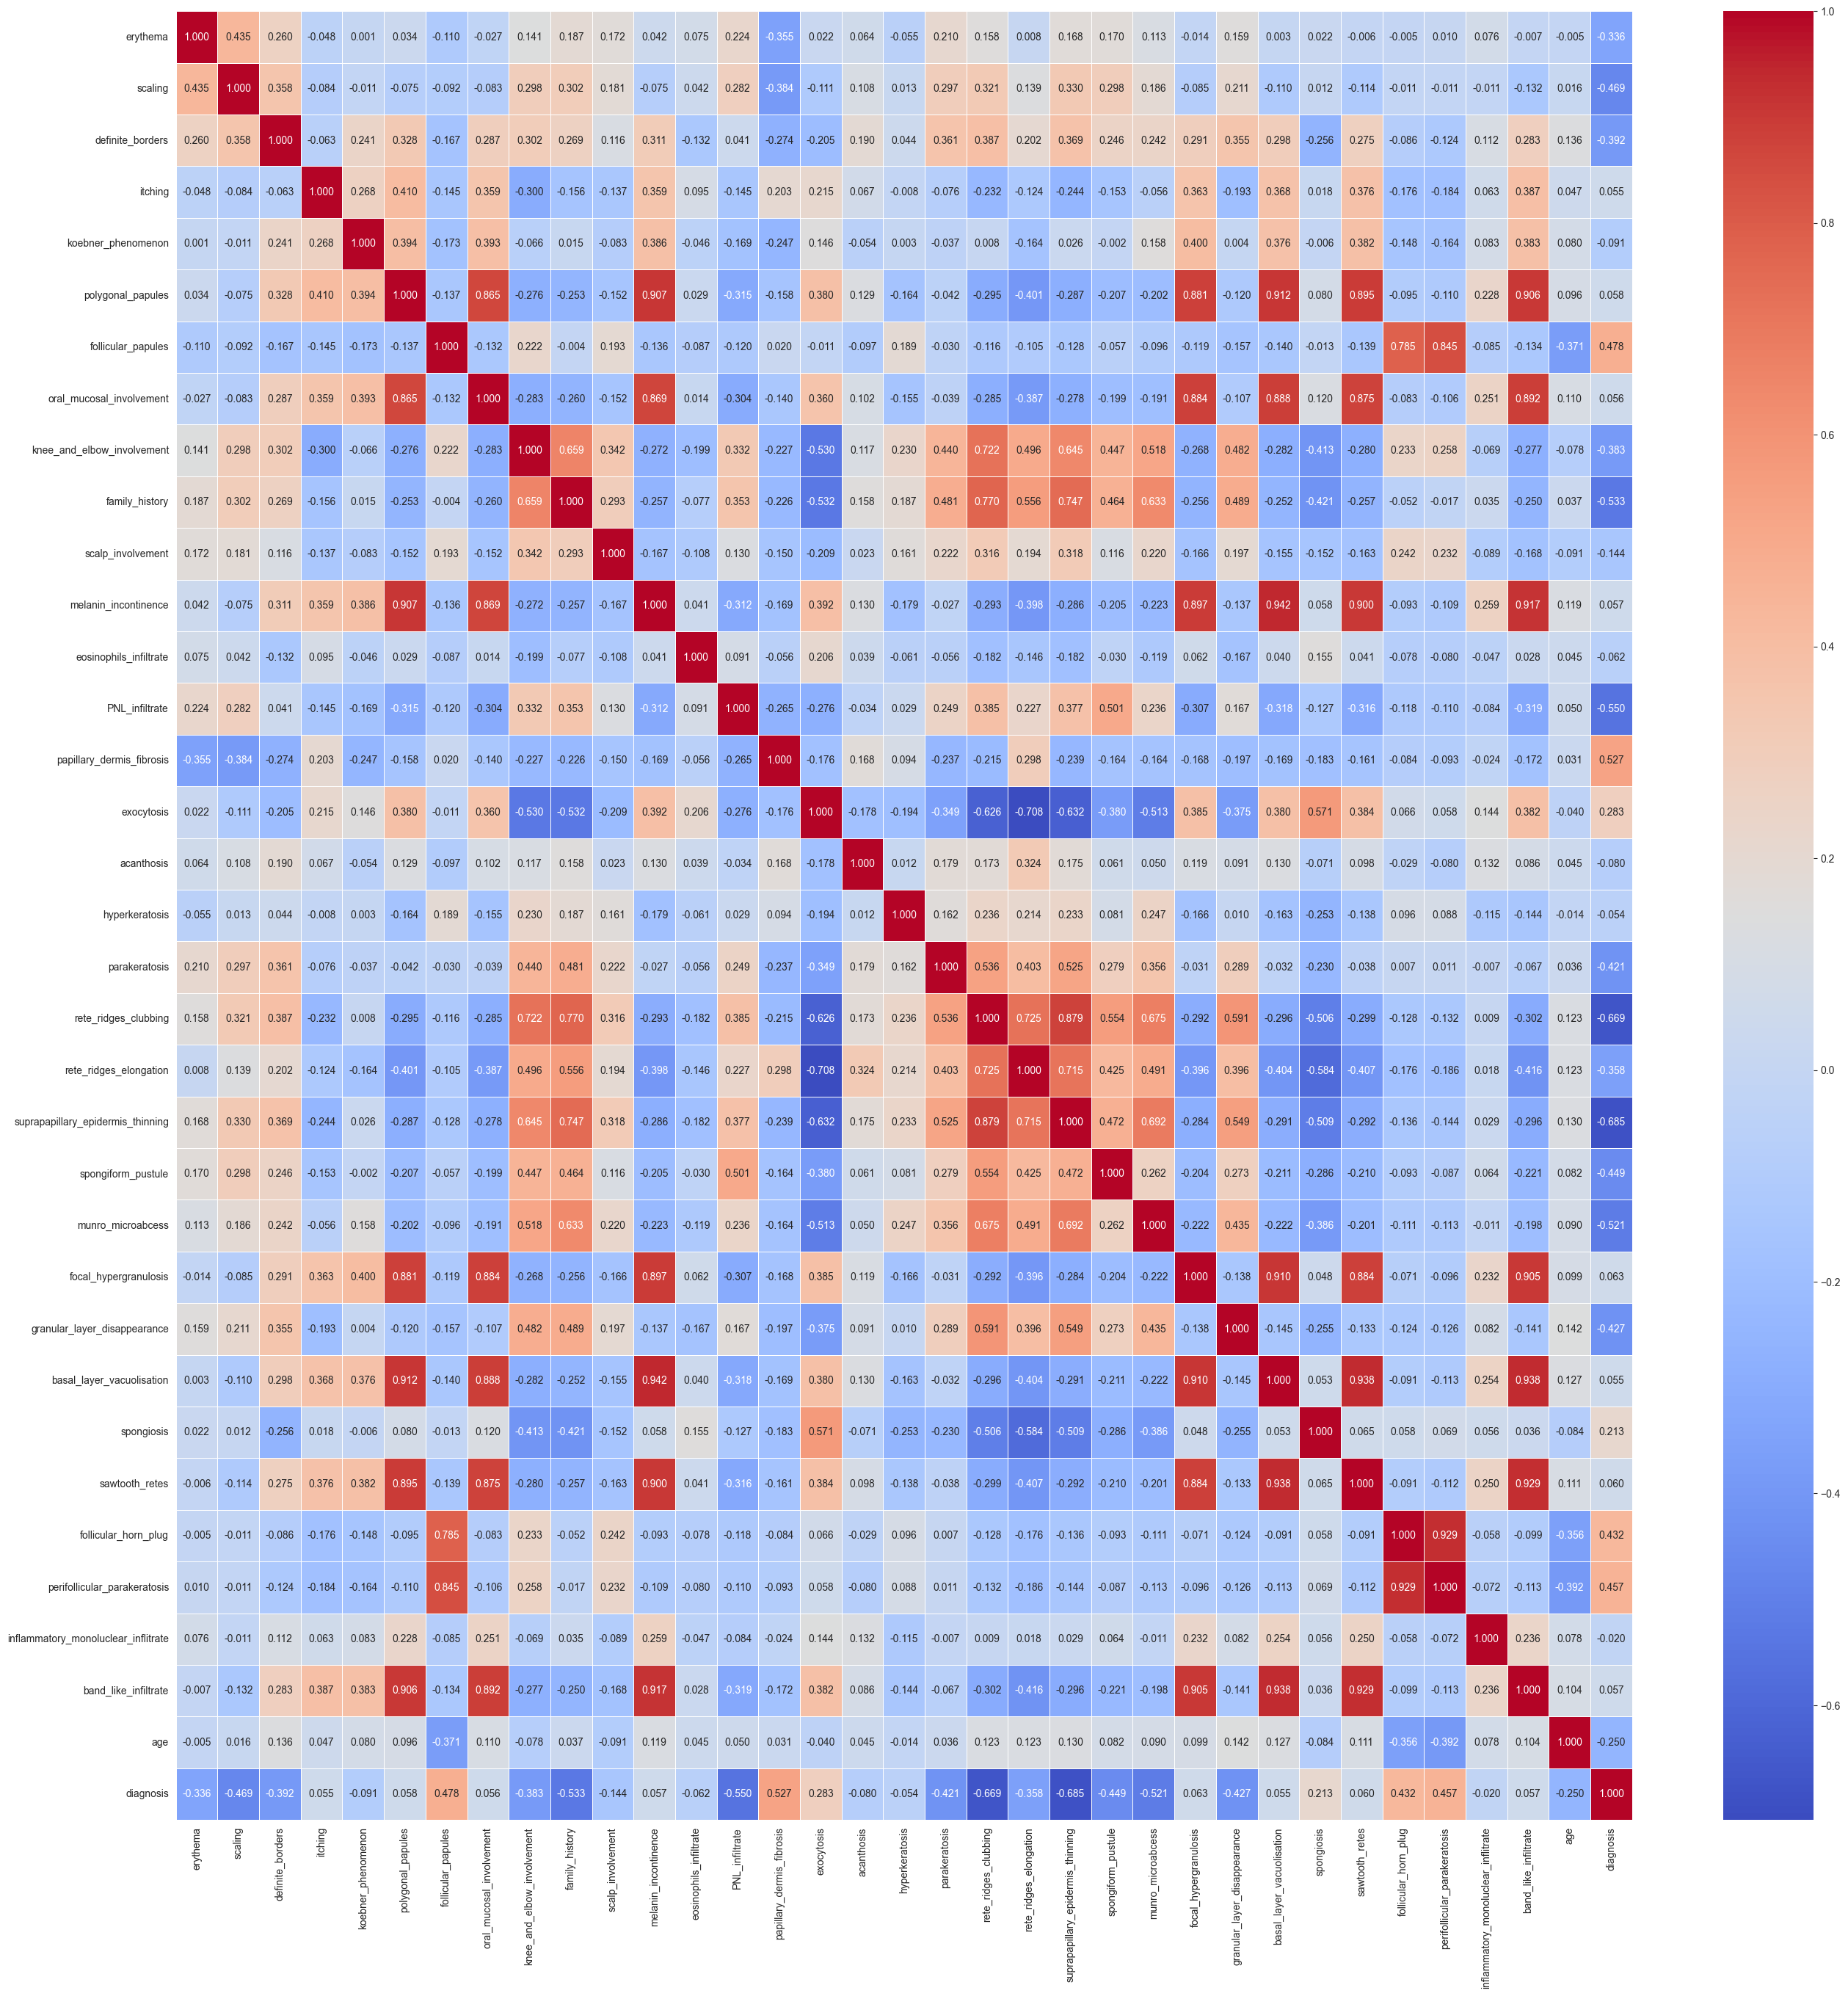

In [252]:
plt.subplots(figsize=(32, 32))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=.5, cmap="coolwarm")

### Correlation Between Features ###
We can see **significant colinearity** between various features in the above correlation matrix. The following factors show significant correlation with other factors (correlation score of 0.8 or higher)

   - polygonal_papules
   - follicular_papules
   - oral_mucosal_involvement
   - melanin_incontinence
   - focal_hypergranulosis
   - basal_layer_vacuolisation
   - sawtooth_retes
   - follicular_horn_plug
   - perifollicular_parakeratosis
   - band_like_infiltrate

None of the features has an exceptionally strong correlation to the diagnosis, but a few have moderate correlations (+/- 0.5-0.79) with the diagnosis. **I hypothesize that when using models trained on raw data some of these features will be most relevant.** These include:

   - family_history
   - PNL_infiltrate
   - papillary_dermis_fibrosis
   - rete_ridges_clubbing
   - suprapapillary_epidermis_thinning
   - munro_microabcess

Because both KMeans and Agglomerative Clustering are based on distance calculations, colinearity can impact them negatively. Using Principal Component Analysis can eliminate the colinearity between features and allow both clustering methods to perform better. (Uzila, 2025) **I hypothesize that these clustering models will perform better on data transformed with PCA than on raw data.**

In [253]:
#As a final step, we will separate the training and label data into X and y
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Feature Engineering, Transformation, and Visualization with Principal Component Analysis (PCA) #

Principal Component Analysis is primarily a dimensionality reduction technique. But it can also be used to project a dataset onto two dimensions for visualization. (GeeksforGeeks, 2025) The dimensionality reduction can later be used in models and is a kind of feature engineering. As a first step, we will **transform the data** with the StandardScaler.



In [254]:
#PCA works better with scaled data (GeeksforGeeks 2025)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#transform to 2 primary components
pca = PCA(n_components=2)
pca_out_df_2 = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.27175631 0.16124123]
Cumulative Explained Variance: [0.27175631 0.43299754]


Two primary components explain cumulatively less than half of the variance. The graph below shows the classes are quite intermingled when projected onto two features.

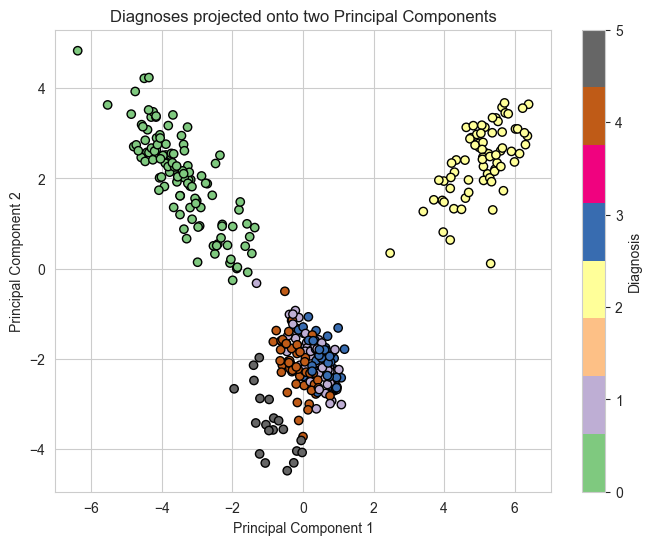

In [255]:
plt.figure(figsize=(8,6))
plt.scatter(pca_out_df_2[:, 0], pca_out_df_2[:, 1], c=y, cmap='Accent', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Diagnoses projected onto two Principal Components")
plt.colorbar(label="Diagnosis")
plt.show()

Note that classes 0 and 2 are well separated. 5 is also separated. But 1, 3, 4 are intermingled.

Let's see whether a third principal component helps to separate the data


In [256]:
pca = PCA(n_components=3)
pca_out_df_3 = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


Explained variance: [0.27175631 0.16124123 0.09141161]
Cumulative Explained Variance: [0.27175631 0.43299754 0.52440915]


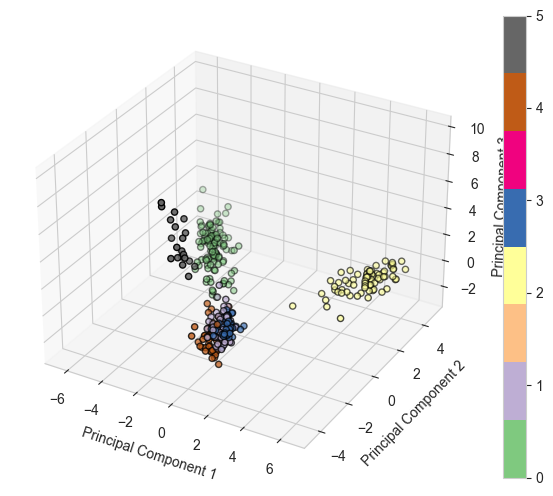

In [257]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

p = ax.scatter(pca_out_df_3[:, 0], pca_out_df_3[:, 1], pca_out_df_3[:, 2], c=y, cmap='Accent', edgecolor='k')
fig.colorbar(p)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

The third principal component only raised our cumulative explanation of variance to 52%. The same classes are clustered together in three dimensions as were in two. This tells me we will probably have good results clustering classes 0, 2, and 5, but less success with the others.

From this, we can **hypothesize that the first three principal components will not be enough to reliably cluster the data**. A larger number of principal components will be required.

As one more exercise, let's see how much of the variance we can account for with more principal components

In [259]:
pca_results = {}
pca_explained_variance = {}
for i in range(1, 25):
    my_pca = PCA(n_components=i)
    my_pca_result = my_pca.fit_transform(X_scaled)
    pca_results[i] = my_pca_result
    pca_explained_variance[i] = np.sum(my_pca.explained_variance_ratio_, axis=0)
    print(f"Components: {i} Cumulative Explained Variance:{np.sum(my_pca.explained_variance_ratio_, axis=0)}")



Components: 1 Cumulative Explained Variance:0.27175630689697094
Components: 2 Cumulative Explained Variance:0.432997539604807
Components: 3 Cumulative Explained Variance:0.524409146334228
Components: 4 Cumulative Explained Variance:0.590060356157993
Components: 5 Cumulative Explained Variance:0.6294840945331609
Components: 6 Cumulative Explained Variance:0.6650361906762325
Components: 7 Cumulative Explained Variance:0.6952841987084581
Components: 8 Cumulative Explained Variance:0.7235302462518998
Components: 9 Cumulative Explained Variance:0.7491895198785223
Components: 10 Cumulative Explained Variance:0.7740332560349925
Components: 11 Cumulative Explained Variance:0.7976844357245466
Components: 12 Cumulative Explained Variance:0.8191390720037627
Components: 13 Cumulative Explained Variance:0.8395486220487559
Components: 14 Cumulative Explained Variance:0.8591031189879703
Components: 15 Cumulative Explained Variance:0.8760181395279106
Components: 16 Cumulative Explained Variance:0.8927

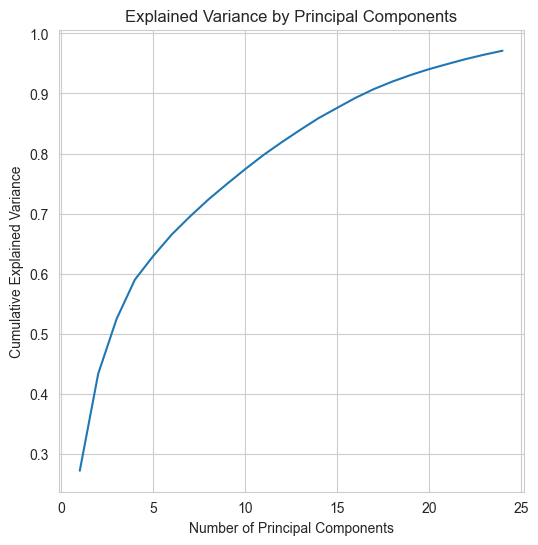

In [260]:
plt.figure(figsize=(6, 6))
plt.plot(pca_explained_variance.keys(), pca_explained_variance.values())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

The graph above shows the increase in how much of the variance can be explained based on the number of principal components used

# Analysis (Model Building and Training) #


In [261]:
#Before we build models, we need a way to map the results of clustering back to the labels in the data.
#The following function accepts the clustering results and the true labels. It returns the clustering results
#after having mapped them to the correct label based on highest f1 score. We use f1 rather than accuracy because of the
#imbalanced data set

def find_best_label_permutation(y_pred):
    y_pred_df = pd.DataFrame(y_pred)
    max_f1 = 0.0
    best_label_permutation = None
    #get  all permutations of (0,1,2,3,4,5)
    permutations = itertools.permutations(range(6))
    #iterate through permutations and replace predicted labels. Compare accuracy
    for permutation in permutations:
        y_permuted = y_pred_df.replace({0: permutation[0], 1: permutation[1], 2: permutation[2],
                                     3: permutation[3], 4: permutation[4], 5: permutation[5] })
        my_f1 = f1_score(y, y_permuted, average='weighted', zero_division=0)
        #if the current f1 is higher that the previous max
        #save it and the permutation as the best
        if my_f1 > max_f1:
            max_f1 = my_f1
            best_label_permutation = y_permuted

    return best_label_permutation, max_f1

def display_results(y_pred):
    print(classification_report(y, y_pred, zero_division=0))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred)).plot()
    disp.ax_.grid(False)
    plt.show()

## KMeans Clustering ##
As a first attempt, we will try using KMeans clustering to cluster the data and then compare how well that matches the known diagnosis labels.

              precision    recall  f1-score   support

           0       0.52      0.15      0.23       112
           1       0.21      0.26      0.23        61
           2       0.33      0.31      0.32        72
           3       0.19      0.33      0.24        49
           4       0.14      0.15      0.15        52
           5       0.41      0.95      0.58        20

    accuracy                           0.27       366
   macro avg       0.30      0.36      0.29       366
weighted avg       0.32      0.27      0.26       366



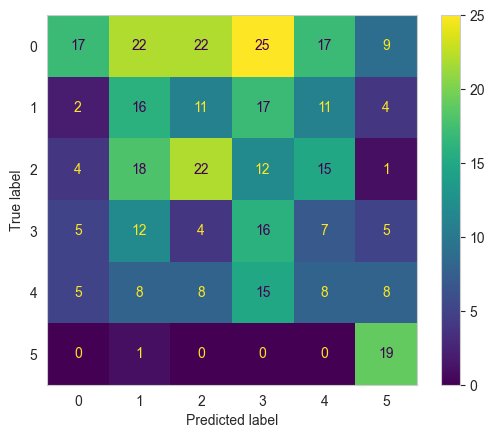

In [262]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(X))
display_results(best_predictions)

Kmeans clustering on the raw data is **essentially useless!** The f1 scores are little better than random assignment of labels would achieve. But the PCA analysis seemed to offer some hope that at least some of the labels were well grouped. This may be due to the colinearity of some features. So let's try using the results of PCA with 3 components.

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       112
           1       0.37      0.98      0.54        61
           2       1.00      0.71      0.83        72
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        52
           5       1.00      1.00      1.00        20

    accuracy                           0.57       366
   macro avg       0.56      0.56      0.53       366
weighted avg       0.62      0.57      0.56       366



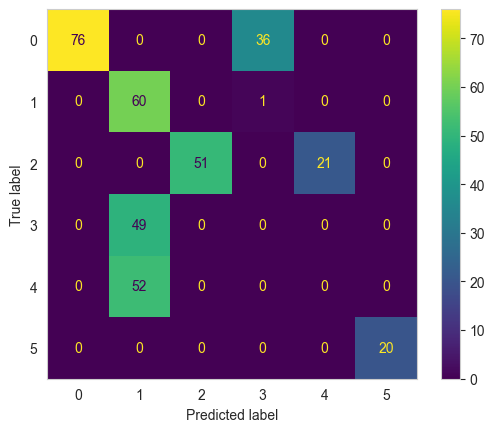

In [263]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_out_df_3))
display_results(best_predictions)

This result is **markedly better.** We see good results on label 5, and ok results on labels 1 and 2. The PCA analysis showed these labels were more isolated than others, and so this makes sense. Our results with categories 3 and 4 is not good. This aligns with how they appeared intermingled after PCA analysis.

Next, let's try 12 and 24 principal components.


              precision    recall  f1-score   support

           0       1.00      0.53      0.69       112
           1       0.54      1.00      0.70        61
           2       1.00      1.00      1.00        72
           3       0.00      0.00      0.00        49
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        20

    accuracy                           0.72       366
   macro avg       0.76      0.75      0.73       366
weighted avg       0.79      0.72      0.72       366



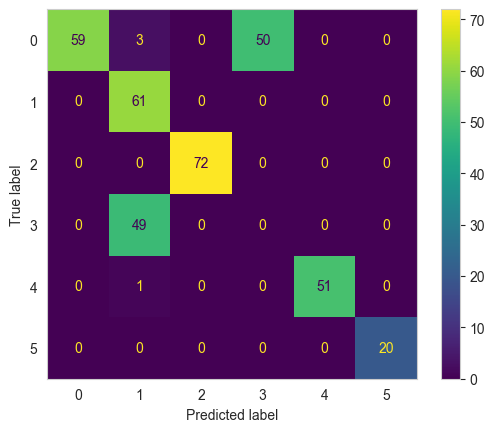

In [264]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_results[12]))
display_results(best_predictions)

KMeans with 12 Principal Components is **much better** with a weighted average f1 of **72%**

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       112
           1       0.85      0.36      0.51        61
           2       1.00      1.00      1.00        72
           3       0.43      0.94      0.59        49
           4       1.00      0.98      0.99        52
           5       0.00      0.00      0.00        20

    accuracy                           0.68       366
   macro avg       0.71      0.63      0.63       366
weighted avg       0.84      0.68      0.71       366



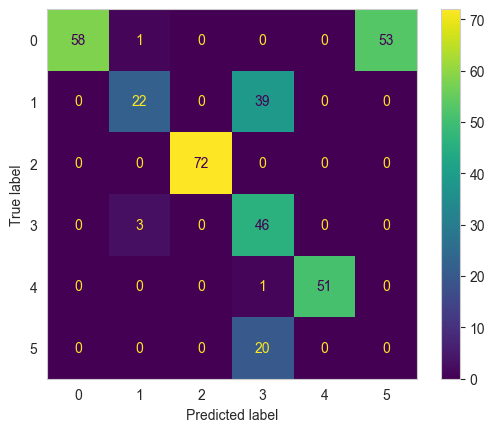

In [265]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_results[24]))
display_results(best_predictions)

KMeans with 24 Principal Components performs slightly less well achieving **only 71%** wieghted average f1 score.

Let's determine the **optimal number of components** for KMeans clustering.


Best K-Means F1: 0.9240246484706678
Best K-Means PCA count: 11
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.89      0.66      0.75        61
           2       1.00      0.99      0.99        72
           3       0.68      0.98      0.80        49
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        20

    accuracy                           0.92       366
   macro avg       0.93      0.93      0.92       366
weighted avg       0.94      0.92      0.92       366



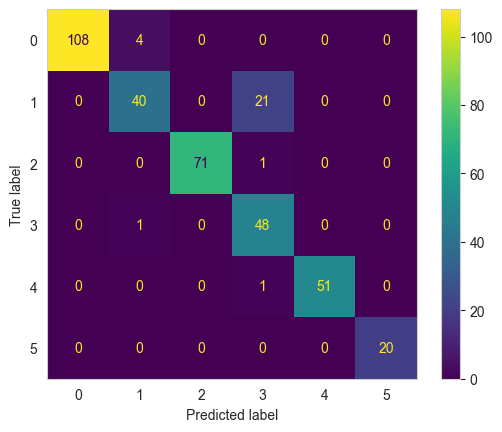

In [266]:
best_kmeans_f1 = 0
best_kmeans_predictions = None
best_kmeans_pca_count = 0
pca_to_f1 = {}
for i in range(1, 25):
    kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
    my_predictions, my_f1 = find_best_label_permutation(kmeans.fit_predict(pca_results[i]))
    pca_to_f1[i] = my_f1
    if my_f1 > best_kmeans_f1:
        best_kmeans_f1 = my_f1
        best_kmeans_predictions = my_predictions
        best_kmeans_pca_count = i

print(f"Best K-Means F1: {best_kmeans_f1}")
print(f"Best K-Means PCA count: {best_kmeans_pca_count}")
display_results(best_kmeans_predictions)

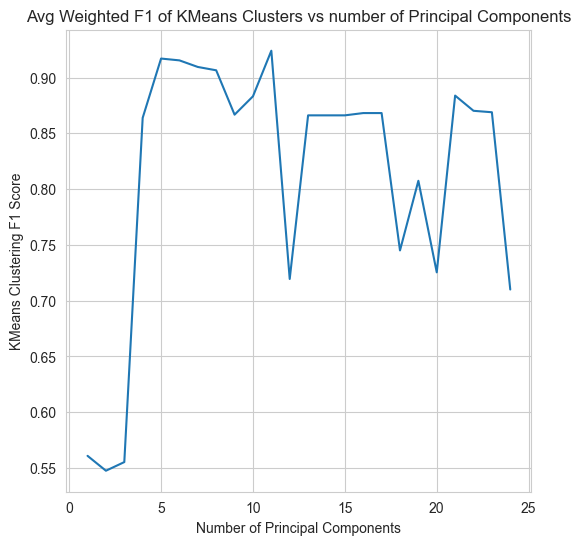

In [267]:
plt.figure(figsize=(6, 6))
plt.plot(pca_to_f1.keys(), pca_to_f1.values())
plt.xlabel('Number of Principal Components')
plt.ylabel('KMeans Clustering F1 Score')
plt.title('Avg Weighted F1 of KMeans Clusters vs number of Principal Components')
plt.show()

### KMeans Results Analysis ###

KMeans was unable to cluster results effectively when using raw data. However, when using principal components, KMeans did much better. The **best KMeans weighted average f1 score was 92%** which was achieved when using 11 prinicpal components.


## Agglomerative Clustering ##
As a next attempt, we will try using Agglomerative clustering to cluster the data and then compare how well that matches the known diagnosis labels.


              precision    recall  f1-score   support

           0       0.60      0.24      0.34       112
           1       0.23      0.21      0.22        61
           2       0.34      0.28      0.31        72
           3       0.16      0.22      0.19        49
           4       0.17      0.38      0.24        52
           5       0.65      0.75      0.70        20

    accuracy                           0.29       366
   macro avg       0.36      0.35      0.33       366
weighted avg       0.37      0.29      0.30       366



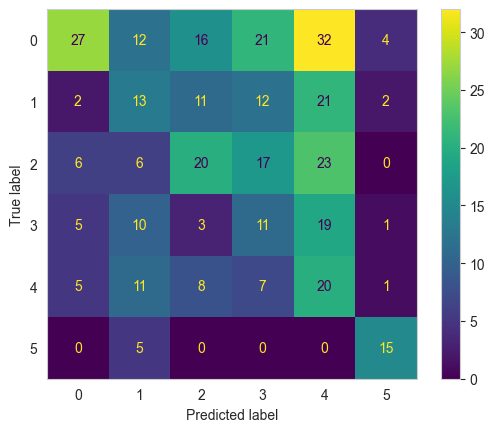

In [268]:
agg = AgglomerativeClustering(n_clusters=6)
best_predictions, _ = find_best_label_permutation(agg.fit_predict(X))
display_results(best_predictions)

AgglomerativeClustering, like KMeans, performed very poorly on the raw data. Probably due to the colinear features. Let's try it with various PCA component counts.

### Hyperparameter Tuning with Agglomerative Clustering ###

Agglomerative Clustering offers several options for the linkage parameter which can affect clusters. In the code below, we will find the optimal number of principal components and the optimal linkage through hyperparameter tuning.


Best AgglomerativeClustering F1: 0.9619372191676222
Best AgglomerativeClustering PCA count: 7
Best AgglomerativeClustering linkage: ward
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.93      0.84      0.88        61
           2       1.00      1.00      1.00        72
           3       0.82      0.94      0.88        49
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        20

    accuracy                           0.96       366
   macro avg       0.96      0.96      0.96       366
weighted avg       0.96      0.96      0.96       366



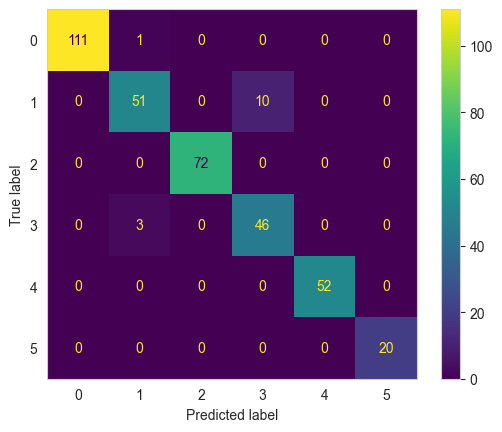

In [275]:
best_agg_f1 = 0
best_agg_predictions = None
best_agg_pca_count = 0
pca_to_f1 = {}
best_linkage = None
linkages = ['single', 'average', 'complete', 'ward']
for linkage in linkages:
    for i in range(1, 25):
        agg = AgglomerativeClustering(n_clusters=6, linkage=linkage)
        my_predictions, my_f1 = find_best_label_permutation(agg.fit_predict(pca_results[i]))
        pca_to_f1[i] = my_f1
        if my_f1 > best_agg_f1:
            best_agg_f1 = my_f1
            best_agg_predictions = my_predictions
            best_agg_pca_count = i
            best_linkage = linkage

print(f"Best AgglomerativeClustering F1: {best_agg_f1}")
print(f"Best AgglomerativeClustering PCA count: {best_agg_pca_count}")
print(f"Best AgglomerativeClustering linkage: {best_linkage}")
display_results(best_agg_predictions)

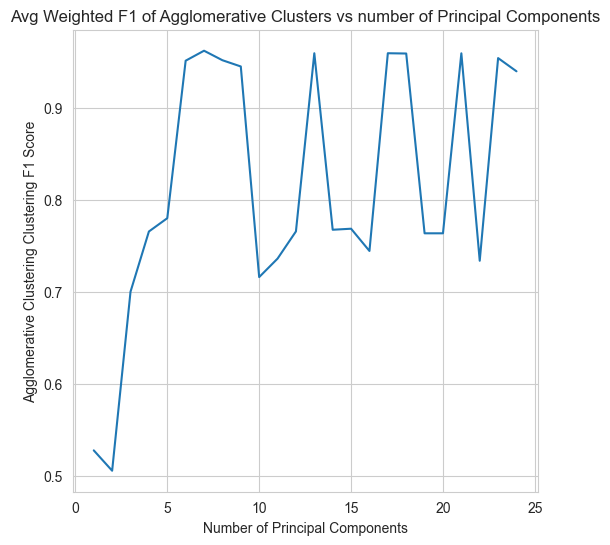

In [270]:
plt.figure(figsize=(6, 6))
pca_keys = list(pca_to_f1.keys())
pca_keys.sort()
pca_values = []
for pca_key in pca_keys:
    pca_values.append(pca_to_f1[pca_key])
plt.plot(pca_keys, pca_values)
plt.xlabel('Number of Principal Components')
plt.ylabel('Agglomerative Clustering Clustering F1 Score')
plt.title('Avg Weighted F1 of Agglomerative Clusters vs number of Principal Components')
plt.show()

Agglomerative Clustering performed very similarly to KMeans with a **weighted average f1 score of 96%**. Agglomerative Clustering saw the best results with seven principal components.


## Decision Tree with Hyperparameter Tuning ##

We will use a DecisionTree to help visualize which of the factors may be most important.

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        10
           5       1.00      0.67      0.80         3

    accuracy                           0.99        74
   macro avg       0.98      0.94      0.96        74
weighted avg       0.99      0.99      0.99        74



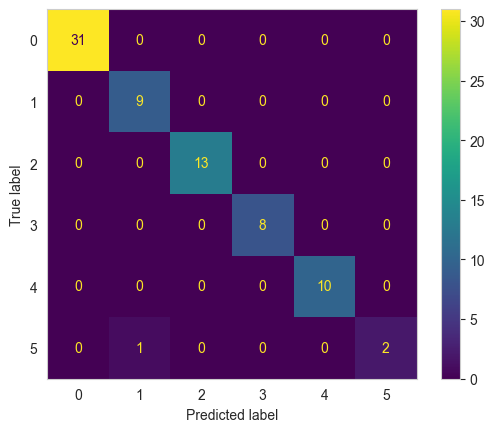

In [278]:
#We need to split our data into test a nd train sets for supervised learning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#define hyperparameters to tune
dt_params = [{'max_depth': [15, 25],
           'criterion': ["gini", "entropy", "log_loss"],
           'min_samples_leaf': [1, 2, 3, 4, 5]}]
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, scoring='accuracy', cv=5)
dt_clf.fit(X_train, y_train)
print(dt_clf.best_params_)
y_hat = dt_clf.predict(X_test)
print(classification_report(y_test, y_hat))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_hat)).plot()
disp.ax_.grid(False)
plt.show()

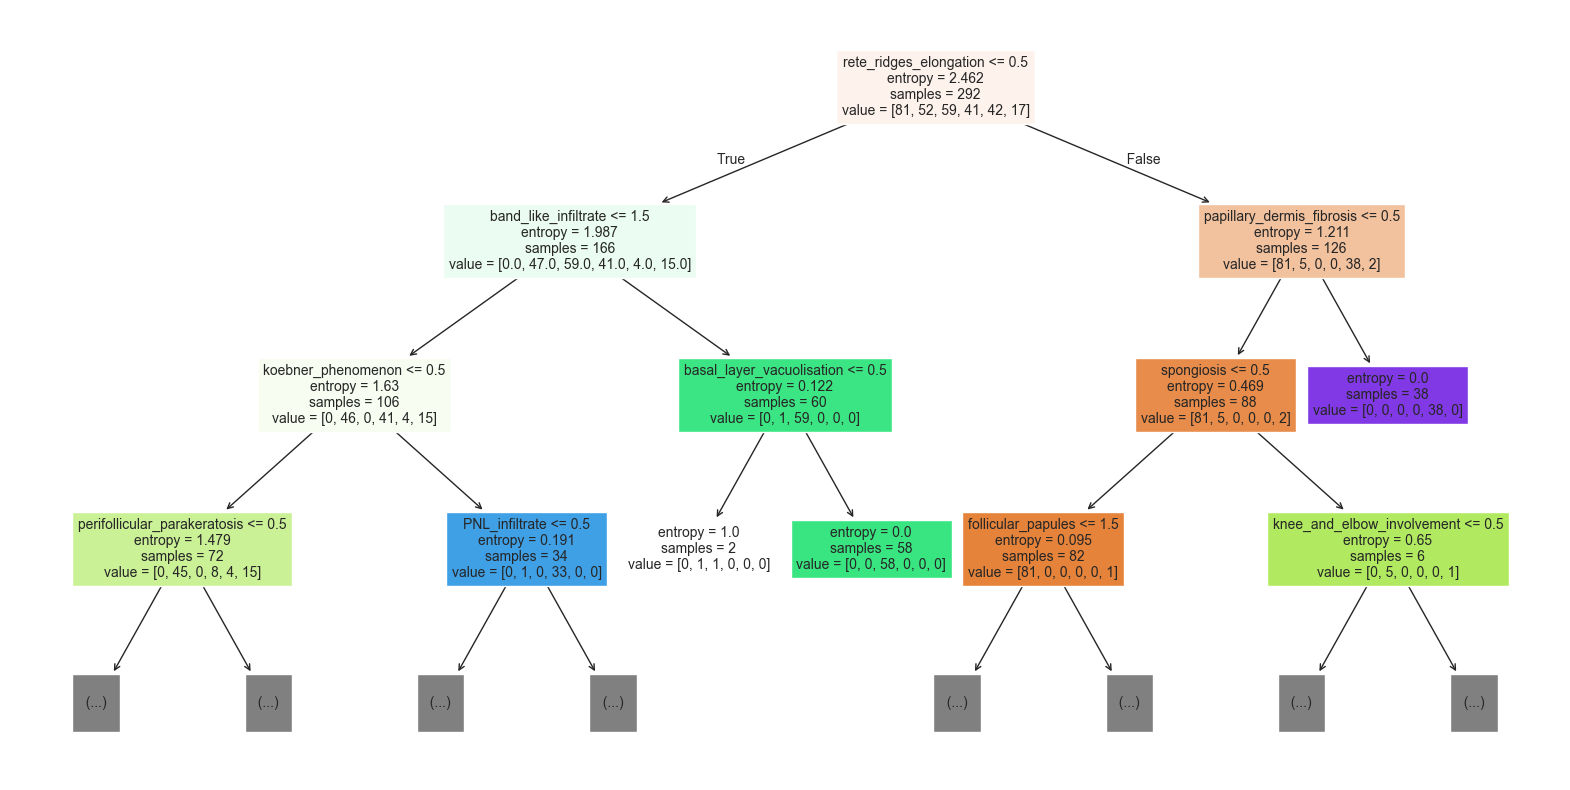

In [281]:
#plot a subset of the decision tree)
plt.figure(figsize=(20, 10))
plot_tree(dt_clf.best_estimator_, feature_names=column_names, filled=True, max_depth=3, fontsize=10)
plt.show()

We can use the visualization of the Decision Tree to evaluate the hypothesis of which factors in the data are most important. The list below includes those features we expected would be important due to correlation with the label. Only 2 of the 6 features (bolded below) appear in the first three layers of the Decision Tree. So the hypothesis is mostly disproven. An interesting thing to note is that many of the features that did appear in the tree, but we did not predict as important are features that were identified as highly correlated with other features. This correlation may be playing a role here.


   - family_history
   - **PNL_infiltrate**
   - **papillary_dermis_fibrosis**
   - rete_ridges_clubbing
   - suprapapillary_epidermis_thinning
   - munro_microabcess

## Random Forest with Hyperparameter Tuning ##

We will now compare the performance of a Random Forest with hyperparameter tuning to the unsupervised clustering.


{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 75}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



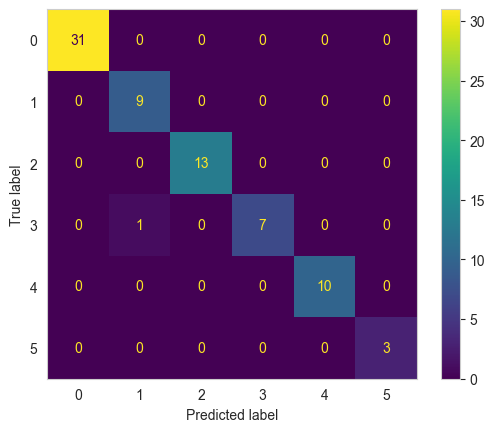

In [271]:

#define hyperparameters to tune
rf_params = [{'n_estimators': [10, 25, 50, 75, 100],
            'max_depth':  [10, 50, 100],
            'min_samples_leaf': [1, 2, 3, 4, 5] }]
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, scoring='accuracy', cv=5)
rf_clf.fit(X_train, y_train)
print(rf_clf.best_params_)
y_hat = rf_clf.predict(X_test)
print(classification_report(y_test, y_hat))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_hat)).plot()
disp.ax_.grid(False)
plt.show()

# Results and Analysis #

During the model training and selection phase, I attempted **unsupervised learning** by clustering raw data using both KMeans and Agglomerative clustering, and then I **iterated over multiple PCA outputs** to find the best performance of each type of clustering. Both types of clustering performed very poorly on raw data, and with principal components, both methods achieved a 92% weighted f1 score (which I used because the data was imbalanced). I the used **hyperparamter tuning** to optimize a **supervised training** Random Forest model. Supervised learning performed well on the raw data achieving a **99% weighted average f1 score**

The average weighted f1 scores for each classifier are shown in the table below.

| Classifier                                    | f1 score |
|-----------------------------------------------|----------|
| KMeans (raw data)                             | 0.26     |
| KMeans (PCA n_components=11)                  | 0.92     |
| Agglomerative Clustering (raw data)           | 0.30     |
| Agglomerative Clustering (PCA n_components=7) | 0.96     |
| RandomForestClassifier (raw data)             | 0.99     |



The best f1 score and the fewest misclassified examples were achieved with a **RandomForestClassifier** after conducting a grid search for the optimal hyperparameters. That optimized classifier and it's results are shown below.

The **metric** used to evaluate the models was: **average weighted f1-score**. This metric was chosen because the input data was not balanced across classes.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



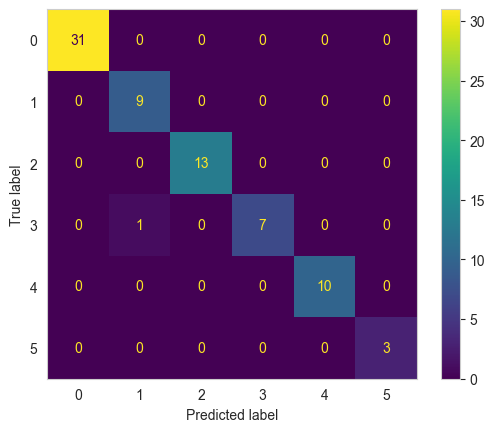

In [272]:
print(classification_report(y_test, y_hat))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_hat)).plot()
disp.ax_.grid(False)
plt.show()

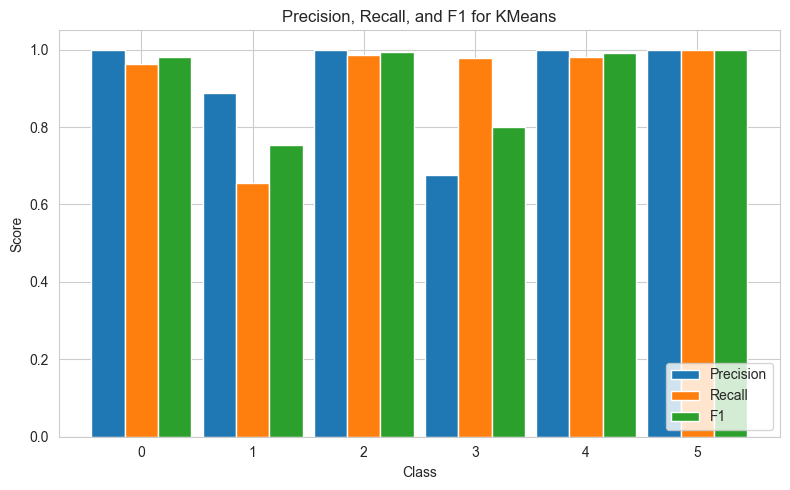

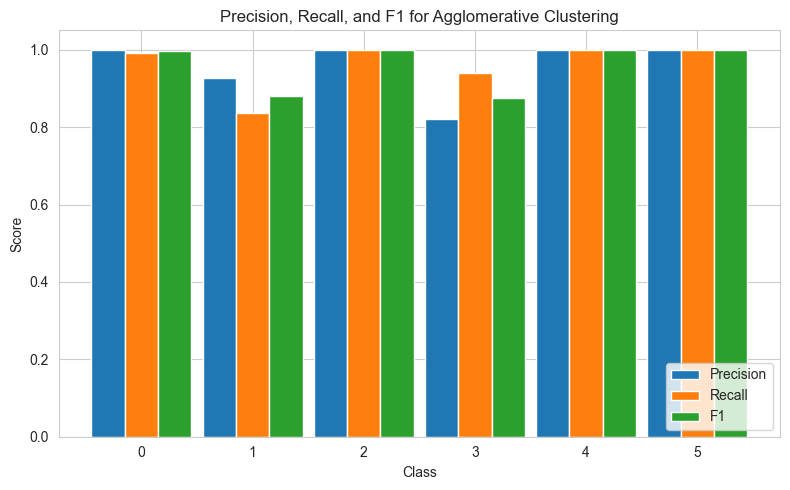

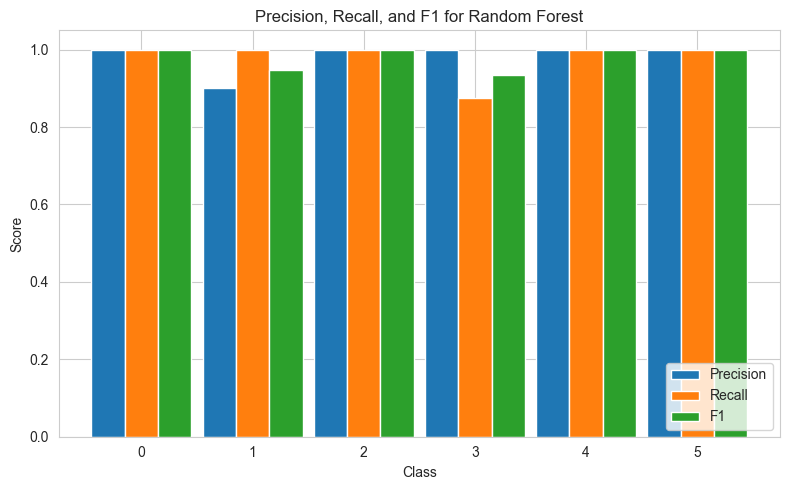

In [273]:
def plot_model_chart(y_actual, y_hat, classifier_name):
    classes = np.unique(y_actual)
    precision = precision_score(y_actual, y_hat, average=None, labels=classes)
    recall = recall_score(y_actual, y_hat, average=None, labels=classes)
    f1 = f1_score(y_actual, y_hat, average=None, labels=classes)
    x = np.arange(len(classes))
    width = 0.3
    plt.figure(figsize=(8, 5))
    plt.bar(x-width, precision, width, label='Precision')
    plt.bar(x, recall, width, label='Recall')
    plt.bar(x+width, f1, width, label='F1')

    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(f'Precision, Recall, and F1 for {classifier_name}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_model_chart(y, best_kmeans_predictions, 'KMeans')
plot_model_chart(y, best_agg_predictions, 'Agglomerative Clustering')
plot_model_chart(y_test, y_hat, 'Random Forest')

The precision,  show that all models performed best with classes 0, 2, 4, and 5 and had more difficulty with clasees 1 and 3.

# Discussion and Conclusion #

## Learnings and Takeaways ##

- The KMeans and Agglomerative Clustering models performed far better on the data once it had been processed into principal components. **This confirms the hypothesis that the colinearity of the features would be problematic.**
- Unsupervised clustering models required significantly more principal components that the first three. This confirms the hypothesis the **the first three principal components would not be enough to reliably cluster the data.**
- While the unsupervised clustering algorithms performed reasonably well (92% and 96% f1), the Random Forest supervised algorithm outperformed them at (99% f1).
- The best linkage model for Agglomerative Clustering was ward which minimizes variance in the clusters.
- Without the true labels to compare, it would have been difficult to achieve good results with the unsupervised models. It would have been very difficult to determine what number of principal components resulted in the best performance.

## Things That Did Not Work as Expected ##

- KMeans and Agglomerative Clustering models performed exceptionally poorly on raw data. Their performance seemed little better than random. This may have been due to several co-linear features in the data set. But I found the poor performance to be surprising.
- I expected that f1 would increase as number of principal components increased. This did not turn out to be true.
- I hypothesized that certain features would be more important de to their correlation with the label. Only 2 of the 6 features appeared in the top three layers of the decision tree rendering the hypothesis as incorrect.

## Future Improvements ##

- Further investigation is warranted into the performance of the various clustering algorithms with various numbers of principal components. The graphs showing the F1 score compared to the number of principal components are not smooth and do not move in a continuous direction.

# Citations #

- Ilter, N. & Guvenir, H. (1998). Dermatology [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5FK5P.
- GeeksforGeeks. (2025, July 23). Implementing PCA in python with scikit-learn. https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/
- Uzila, A. (2025, January 20). K-means clustering and principal component analysis in 10 minutes. Towards Data Science. https://towardsdatascience.com/k-means-clustering-and-principal-component-analysis-in-10-minutes-2c5b69c36b6b/

